In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None 
from Bio import SeqIO
import io
from io import StringIO

In [2]:
df = pd.read_csv('proteusAll.tsv', sep="\t", dtype={'Sequence': 'str', 'Modified sequence': 'str', 'Modifications': 'str', 'Proteins': 'str', 'Leading razor protein': 'str', 
                                                  'Experiment': 'int', 'Charge': 'int', 'Reverse': 'str', 'Potential contaminant': 'str', 'Reporter intensity 1': 'float',
                                                  'Reporter intensity 2':'float', 'Reporter intensity 3': 'float', 'Reporter intensity 4': 'float',
                                                  'Reporter intensity 5': 'float', 'Reporter intensity 6': 'float', 'Reporter intensity 7': 'float',
                                                  'Reporter intensity 8': 'float', 'Reporter intensity 9': 'float', 'Reporter intensity 10': 'float',})

In [3]:
df = df.drop_duplicates(subset='Sequence', keep="first") #REMOVE DUPLICATES

In [4]:
df

,Sequence,Modified sequence,Modifications,Proteins,Leading razor protein,Experiment,Charge,Reverse,Potential contaminant,Reporter intensity 1,Reporter intensity 2,Reporter intensity 3,Reporter intensity 4,Reporter intensity 5,Reporter intensity 6,Reporter intensity 7,Reporter intensity 8,Reporter intensity 9,Reporter intensity 10
0,AAAAAAAATMALAAPSSPTPESPTMLTK,_AAAAAAAATMALAAPSSPTPESPTMLTK_,Unmodified,INCENP,INCENP,1,4,NaN,NaN,1227.10,2029.8,1706.10,1627.90,2152.40,1703.40,1626.2,1878.30,1300.10,1281.10
1,AAAAAAAGDSDSWDADAFSVEDPVR,_(Acetyl (Protein N-term))AAAAAAAGDSDSWDADAFSV...,Acetyl (Protein N-term),EIF3J,EIF3J,1,3,NaN,NaN,3567.00,6282.9,5224.40,6393.70,3946.40,3680.90,3678.1,5648.10,2974.00,2880.20
3,AAAAAAAGDSDSWDADAFSVEDPVRK,_(Acetyl (Protein N-term))AAAAAAAGDSDSWDADAFSV...,Acetyl (Protein N-term),EIF3J,EIF3J,1,3,NaN,NaN,9892.50,12415.0,10484.00,8091.60,10791.00,7756.90,9398.8,10201.00,3995.00,6233.10
6,AAAAAAALQAK,_AAAAAAALQAK_,Unmodified,RPL4,RPL4,1,3,NaN,NaN,1432.70,2065.6,1541.50,1309.60,1399.40,1293.00,1301.9,1506.40,973.21,933.73
10,AAAAAAGAASGLPGPVAQGLK,_(Acetyl (Protein N-term))AAAAAAGAASGLPGPVAQGLK_,Acetyl (Protein N-term),IPO9,IPO9,1,3,NaN,NaN,2484.60,2721.5,2206.10,1993.40,2238.30,1884.80,2516.6,2614.40,996.36,1732.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98547,YYTGNYDQYVK,_YYTGNYDQYVK_,Unmodified,ABCF2,ABCF2,1,2,NaN,NaN,28702.00,33926.0,26287.00,24007.00,29749.00,25552.00,22878.0,25038.00,20123.00,27010.00
98548,YYTLEEIQK,_YYTLEEIQK_,Unmodified,CYB5A,CYB5A,1,2,NaN,NaN,21173.00,22902.0,23303.00,17612.00,20777.00,15935.00,26222.0,23007.00,9133.50,8874.80
98550,YYTLFGR,_YYTLFGR_,Unmodified,EPRS1,EPRS1,1,2,NaN,NaN,4363.60,5652.1,4262.50,4063.70,4836.70,4661.00,4770.3,4726.30,2351.40,2785.60
98551,YYTSASGDEMVSLK,_YYTSASGDEM(Oxidation (M))VSLK_,Oxidation (M),HSP90AA1,HSP90AA1,1,3,NaN,NaN,4335.30,4694.8,3483.10,5046.20,5346.70,5158.70,7120.2,4489.20,2699.60,3253.30


In [5]:
df['MScleavage_sites'] = df['Sequence'].str.findall(r".(?:(?<![KR](?!P)).)*") 
df['liststring'] = [','.join(map(str, l)) for l in df['MScleavage_sites']]
df['new'] = df.liststring.str.count(',')

In [6]:
df

,Sequence,Modified sequence,Modifications,Proteins,Leading razor protein,Experiment,Charge,Reverse,Potential contaminant,Reporter intensity 1,...,Reporter intensity 4,Reporter intensity 5,Reporter intensity 6,Reporter intensity 7,Reporter intensity 8,Reporter intensity 9,Reporter intensity 10,MScleavage_sites,liststring,new
0,AAAAAAAATMALAAPSSPTPESPTMLTK,_AAAAAAAATMALAAPSSPTPESPTMLTK_,Unmodified,INCENP,INCENP,1,4,NaN,NaN,1227.10,...,1627.90,2152.40,1703.40,1626.2,1878.30,1300.10,1281.10,[AAAAAAAATMALAAPSSPTPESPTMLTK],AAAAAAAATMALAAPSSPTPESPTMLTK,0
1,AAAAAAAGDSDSWDADAFSVEDPVR,_(Acetyl (Protein N-term))AAAAAAAGDSDSWDADAFSV...,Acetyl (Protein N-term),EIF3J,EIF3J,1,3,NaN,NaN,3567.00,...,6393.70,3946.40,3680.90,3678.1,5648.10,2974.00,2880.20,[AAAAAAAGDSDSWDADAFSVEDPVR],AAAAAAAGDSDSWDADAFSVEDPVR,0
3,AAAAAAAGDSDSWDADAFSVEDPVRK,_(Acetyl (Protein N-term))AAAAAAAGDSDSWDADAFSV...,Acetyl (Protein N-term),EIF3J,EIF3J,1,3,NaN,NaN,9892.50,...,8091.60,10791.00,7756.90,9398.8,10201.00,3995.00,6233.10,"[AAAAAAAGDSDSWDADAFSVEDPVR, K]","AAAAAAAGDSDSWDADAFSVEDPVR,K",1
6,AAAAAAALQAK,_AAAAAAALQAK_,Unmodified,RPL4,RPL4,1,3,NaN,NaN,1432.70,...,1309.60,1399.40,1293.00,1301.9,1506.40,973.21,933.73,[AAAAAAALQAK],AAAAAAALQAK,0
10,AAAAAAGAASGLPGPVAQGLK,_(Acetyl (Protein N-term))AAAAAAGAASGLPGPVAQGLK_,Acetyl (Protein N-term),IPO9,IPO9,1,3,NaN,NaN,2484.60,...,1993.40,2238.30,1884.80,2516.6,2614.40,996.36,1732.10,[AAAAAAGAASGLPGPVAQGLK],AAAAAAGAASGLPGPVAQGLK,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98547,YYTGNYDQYVK,_YYTGNYDQYVK_,Unmodified,ABCF2,ABCF2,1,2,NaN,NaN,28702.00,...,24007.00,29749.00,25552.00,22878.0,25038.00,20123.00,27010.00,[YYTGNYDQYVK],YYTGNYDQYVK,0
98548,YYTLEEIQK,_YYTLEEIQK_,Unmodified,CYB5A,CYB5A,1,2,NaN,NaN,21173.00,...,17612.00,20777.00,15935.00,26222.0,23007.00,9133.50,8874.80,[YYTLEEIQK],YYTLEEIQK,0
98550,YYTLFGR,_YYTLFGR_,Unmodified,EPRS1,EPRS1,1,2,NaN,NaN,4363.60,...,4063.70,4836.70,4661.00,4770.3,4726.30,2351.40,2785.60,[YYTLFGR],YYTLFGR,0
98551,YYTSASGDEMVSLK,_YYTSASGDEM(Oxidation (M))VSLK_,Oxidation (M),HSP90AA1,HSP90AA1,1,3,NaN,NaN,4335.30,...,5046.20,5346.70,5158.70,7120.2,4489.20,2699.60,3253.30,[YYTSASGDEMVSLK],YYTSASGDEMVSLK,0


In [7]:
df['Proteins'].value_counts()


AHNAK         259
PLEC          247
DYNC1H1       184
MYH9          133
FLNB          126
             ... 
HOOK1           1
HSPB11          1
AL358113.1      1
DSTYK           1
TENT4A          1
Name: Proteins, Length: 5936, dtype: int64

In [8]:
df['new'].value_counts()
miss_c= df['new'].sum()
miss_c

5752

In [9]:
tots=len(df)
tots

43983

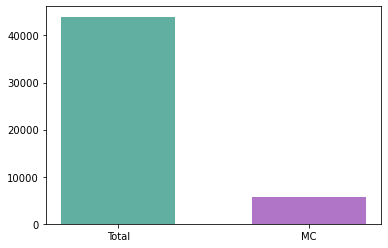

In [10]:
x3 = np.array(["Total","MC"])
y3 = np.array([tots,miss_c])
plt.bar(x3, y3, width= 0.6 , color=["#61afa1", "#b175c7"])
plt.show()

In [11]:
df['R_mc'] = df.liststring.str.count('R,')
df['K_mc'] = df.liststring.str.count('K,')
df['R_mc'].value_counts()

0    43049
1      926
2        8
Name: R_mc, dtype: int64

In [12]:
miss_R= df['R_mc'].sum()
miss_R

942

In [13]:
df['K_mc'].value_counts()
miss_K= df['K_mc'].sum()
miss_K

4810

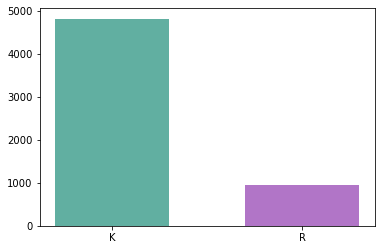

In [14]:
x_new = np.array(["K","R"])
y_new = np.array([miss_K,miss_R])

plt.bar(x_new, y_new, width= 0.6 , color=["#61afa1", "#b175c7"])
plt.show()

In [15]:
df.to_csv ('new.csv', index = False, header=True) #CSV file with new df

In [16]:
pro=[]
for i in df['Proteins']:
    pro.append(i)

import urllib.parse
import urllib.request

url = 'https://www.uniprot.org/uniprot/?query=proteome:UP000005640&format=fasta'

params = {
'from': 'ACC+ID',
'to': 'ENSEMBL_ID',
'format': 'tab',
'query': pro
}

data = urllib.parse.urlencode(params)
data = data.encode('utf-8')
req = urllib.request.Request(url, data)
with urllib.request.urlopen(req) as f:
   response = f.read()
print(response.decode('utf-8'))

import urllib.request

def get_protein_sequences(uniprot_list):
    """Retrieves the sequences from the UniProt database based on the list of
    UniProt ids.
    In general, 
        1. Compose your query here with the advanced search tool:
    https://www.uniprot.org/uniprot/?query=id%3Ap40925+OR+id%3Ap40926+OR+id%3Ao43175&sort=score
        2. Replace `&sort=score` with `&format=fasta`
        3. Edit this function as necessary
    Returns:
        protein_dict (dict): the updated dictionary
    """
    # This makes it so we match only the ENTRY field
    uniprot_list = ['id%3A'+id for id in uniprot_list]
    line = '+OR+'.join(uniprot_list)
    url = 'https://www.uniprot.org/uniprot/?query=proteome:UP000005640&format=fasta'
    with urllib.request.urlopen(url) as f:
        fasta = f.read().decode('utf-8').strip()
    return fasta
    
uniprot_list = pro
print(get_protein_sequences(uniprot_list))

import urllib.parse
import urllib.request

url = 'https://www.uniprot.org/uniprot/?query=proteome:UP000005640&format=fasta'

params = {
'from': 'GENENAME',
'to': 'ACC',
'format': 'tab',
'query': pro,
'taxon': '9606',
'columns': 'id,sequence'

}

data = urllib.parse.urlencode(params)
data = data.encode('ascii')
request = urllib.request.Request(url, data)
with urllib.request.urlopen(request) as response:
   res = response.read()
print(res.decode('ascii'))


def get_uniprot_sequences(uniprot_ids) -> pd.DataFrame:
        """


        Parameters:
            uniprot_ids: List, list of uniprot identifier

        Returns:
            pd.DataFrame, pandas dataframe with uniprot id column and sequence
        """
        import urllib
        url = 'https://www.uniprot.org/uploadlists/'  # This is the webserver to retrieve the Uniprot data
        params = {
            'from': "GENENAME",
            'to': 'ACC',
            'format': 'tab',
            'taxon': '9606',
            'query': " ".join(uniprot_ids),
            'columns': 'sequence, reviewed'}


        data = urllib.parse.urlencode(params)
        data = data.encode('ascii')
        request = urllib.request.Request(url, data)
        with urllib.request.urlopen(request) as response:
            res = response.read()
        df_fasta = pd.read_csv(StringIO(res.decode("utf-8")), sep="\t")
        df_fasta.columns = ["Entry", "Sequence", "Query"]
        # it might happen that 2 different ids for a single query id are returned, split these rows
        return df_fasta.assign(Query=df_fasta['Query'].str.split(',')).explode('Query')
        

cf= get_uniprot_sequences(pro)

cf.drop_duplicates(subset='Query', keep="first") #REMOVE DUPLICATES

In [17]:
#get_uniprot_sequences(pro).to_csv ('pro.csv', index = False, header=True) #CSV file with new df

In [18]:

#with open("pro.csv", 'r') as f:
#    proteins = f.read().splitlines()
    
#seq=[]
#for i in df['Sequence']:
 #   seq.append(i)
        
#with open('result.txt', 'w') as f:
 #   for a in proteins:
  #      matches = [b for b in seq if b in a]
   #     if not matches: continue  
    #    f.write(f"{a}|{','.join(matches)}\n")
        

cf = get_uniprot_sequences(pro).drop_duplicates(subset='Query', keep="first") #REMOVE DUPLICATES

cf = pd.read_csv('pro.csv')

cf= cf.drop_duplicates(subset='Entry', keep="first") #REMOVE DUPLICATES

cf.to_csv ('new_pro.csv', index = False, header=True) #CSV file with new df

In [19]:
#with open("new_pro.csv", 'r') as f:
 #   proteins = f.read().splitlines()
    
#seq=[]
#for i in df['Sequence']:
 #   seq.append(i)
        
#with open('result.csv', 'w') as f:
 #   for a in proteins:
  #      matches = [b for b in seq if b in a]
   #     if not matches: continue  
    #    f.write(f"{a}|{','.join(matches)}\n")

In [20]:
#string= 'ICIRQNIEANFIKPNFQQLFRYLVLDIADNPVENIIRFFPMTKEFIDGSLQMGGKVLVHG|YLVLDIADNPVENIIR'
#split_string = string.split('|')
#data= {'protein': [split_string[0]], 'peptide': [split_string[1]]}
#new_df = pd.DataFrame(data)

In [21]:
with open("review.fasta", 'r') as file:
    proteins = file.read().splitlines()
    
seq=[]
for i in df['Sequence']:
    seq.append(i)
        
with open('result.txt', 'w') as f:
    for a in proteins:
        matches = [b for b in seq if b in a]
        if not matches: continue  
        f.write(f"{a}|{','.join(matches)}\n")

In [22]:
#with open('result.txt', 'r') as myf:
 #   for line in myf:
  #      splitted = line.split('|')
   #     data= {'protein': splitted[0], 'peptide': splitted[1]}
    #    new_df= new_df.append(data, ignore_index=True) 

In [23]:
data= {'protein':'', 'peptide':''}
new_df= pd.DataFrame(data, index=[0])

In [24]:
new_df

,protein,peptide
0,,


In [25]:
with open('result.txt', 'r') as f:
    for line in f:
        splitted = line.split('|')
        for i in splitted[1].split(','):
            data= {'protein': splitted[0], 'peptide': i} 
            new_df= new_df.append(data, ignore_index=True)

In [26]:
new_df

,protein,peptide
0,,
1,MGTTAPGPIHLLELCDQKLMEFLCNMDNKDLVWLEEIQEEAERMFT...,DLVWLEEIQEEAER\n
2,LRRVTRAAAAAAAATMALAAPSSPTPESPTMLTKKPEDNHTQCQLV...,AAAAAAAATMALAAPSSPTPESPTMLTK\n
3,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,AAAAAAAGDSDSWDADAFSVEDPVR
4,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,AAAAAAAGDSDSWDADAFSVEDPVRK\n
...,...,...
36072,THVMLGAETEEKLFDAPLSISKREQLEQQVPENYFYVPDLGQVPEI...,LFDAPLSISK\n
36073,LKSLIIVHPSWFIRTLLAVTRPFISSKFSQKIRYVFNLAELAELVP...,YVFNLAELAELVPMEYVGIPECIK\n
36074,DLKYVNPETVAALLSGKFQGLIEKFYVIDCRYPYEYLGGHIQGALN...,YVNPETVAALLSGK\n
36075,PTTASSYVDSALKPLFQLQSGHKDKLKQAIIQQWLEGTLSESTHKY...,YYETVSDVLNSVK\n


In [27]:
new_df.to_csv ('pro_pep_0.csv', index = False, header=True) #CSV file with new df

In [28]:
protein1= 'EEAEVKPEVKISEKKKIAEKIKEKERQQKKRQEEIKKRLEEPEEPKVLTPEEQLADKLRL'
peptide1= 'LEEPEEPK'
position= protein1.find(peptide1)
last_position_amino_acid= position + len(peptide1)-1
next_position= position+len(peptide1)
protein1[next_position]
print(position)
print(next_position)
print(last_position_amino_acid)
print(protein1[last_position_amino_acid])
print(position+len(peptide1)-1)
print(protein1[next_position])
protein1[45]


38
46
45
K
45
V


'K'

In [29]:

#try:
 #   for seq in new_df['peptide']:
  #      for i in new_df['protein']:
   #         postion= i.find(seq)
    #        if postion != -1:
     #           print(i)
      #          print(seq)
       #         print(postion)
        #        print(i[postion+len(seq)])
         #       print('\n')
#except:
#    print('no match')

In [30]:

new_df=new_df.drop(new_df.index[0])


In [31]:
new_df

,protein,peptide
1,MGTTAPGPIHLLELCDQKLMEFLCNMDNKDLVWLEEIQEEAERMFT...,DLVWLEEIQEEAER\n
2,LRRVTRAAAAAAAATMALAAPSSPTPESPTMLTKKPEDNHTQCQLV...,AAAAAAAATMALAAPSSPTPESPTMLTK\n
3,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,AAAAAAAGDSDSWDADAFSVEDPVR
4,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,AAAAAAAGDSDSWDADAFSVEDPVRK\n
5,EEAEVKPEVKISEKKKIAEKIKEKERQQKKRQEEIKKRLEEPEEPK...,LEEPEEPK
...,...,...
36072,THVMLGAETEEKLFDAPLSISKREQLEQQVPENYFYVPDLGQVPEI...,LFDAPLSISK\n
36073,LKSLIIVHPSWFIRTLLAVTRPFISSKFSQKIRYVFNLAELAELVP...,YVFNLAELAELVPMEYVGIPECIK\n
36074,DLKYVNPETVAALLSGKFQGLIEKFYVIDCRYPYEYLGGHIQGALN...,YVNPETVAALLSGK\n
36075,PTTASSYVDSALKPLFQLQSGHKDKLKQAIIQQWLEGTLSESTHKY...,YYETVSDVLNSVK\n


In [32]:
new_df=new_df.replace('\n', '', regex=True)

In [33]:
new_df

,protein,peptide
1,MGTTAPGPIHLLELCDQKLMEFLCNMDNKDLVWLEEIQEEAERMFT...,DLVWLEEIQEEAER
2,LRRVTRAAAAAAAATMALAAPSSPTPESPTMLTKKPEDNHTQCQLV...,AAAAAAAATMALAAPSSPTPESPTMLTK
3,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,AAAAAAAGDSDSWDADAFSVEDPVR
4,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,AAAAAAAGDSDSWDADAFSVEDPVRK
5,EEAEVKPEVKISEKKKIAEKIKEKERQQKKRQEEIKKRLEEPEEPK...,LEEPEEPK
...,...,...
36072,THVMLGAETEEKLFDAPLSISKREQLEQQVPENYFYVPDLGQVPEI...,LFDAPLSISK
36073,LKSLIIVHPSWFIRTLLAVTRPFISSKFSQKIRYVFNLAELAELVP...,YVFNLAELAELVPMEYVGIPECIK
36074,DLKYVNPETVAALLSGKFQGLIEKFYVIDCRYPYEYLGGHIQGALN...,YVNPETVAALLSGK
36075,PTTASSYVDSALKPLFQLQSGHKDKLKQAIIQQWLEGTLSESTHKY...,YYETVSDVLNSVK


In [34]:
def find_peptide(protein, peptide):
    try:
        position = protein.find(peptide)
        next_position= position+len(str(peptide))
        return protein[next_position]
        
    except:
        return '-'
        #        print(i[postion+len(seq)])



In [35]:
new_df.dtypes

protein    object
peptide    object
dtype: object

In [36]:
protein1= 'LRRVTRAAAAAAAATMALAAPSSPTPESPTMLTKKPEDNHTQCQLVPVVEIGISERQNAE'
peptide1= 'AAAAAAAATMALAAPSSPTPESPTMLTK'

find_peptide(protein1, peptide1) 

'K'

In [37]:
print(new_df['protein'][2])
print(new_df['peptide'][2])

LRRVTRAAAAAAAATMALAAPSSPTPESPTMLTKKPEDNHTQCQLVPVVEIGISERQNAE
AAAAAAAATMALAAPSSPTPESPTMLTK


In [38]:
find_peptide(new_df['protein'][2], new_df['peptide'][2])

'K'

In [39]:
new_df['next_aa']= new_df.apply(lambda row: find_peptide(row['protein'], row['peptide']), axis=1)
new_df


,protein,peptide,next_aa
1,MGTTAPGPIHLLELCDQKLMEFLCNMDNKDLVWLEEIQEEAERMFT...,DLVWLEEIQEEAER,M
2,LRRVTRAAAAAAAATMALAAPSSPTPESPTMLTKKPEDNHTQCQLV...,AAAAAAAATMALAAPSSPTPESPTMLTK,K
3,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,AAAAAAAGDSDSWDADAFSVEDPVR,K
4,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,AAAAAAAGDSDSWDADAFSVEDPVRK,V
5,EEAEVKPEVKISEKKKIAEKIKEKERQQKKRQEEIKKRLEEPEEPK...,LEEPEEPK,V
...,...,...,...
36072,THVMLGAETEEKLFDAPLSISKREQLEQQVPENYFYVPDLGQVPEI...,LFDAPLSISK,R
36073,LKSLIIVHPSWFIRTLLAVTRPFISSKFSQKIRYVFNLAELAELVP...,YVFNLAELAELVPMEYVGIPECIK,Q
36074,DLKYVNPETVAALLSGKFQGLIEKFYVIDCRYPYEYLGGHIQGALN...,YVNPETVAALLSGK,F
36075,PTTASSYVDSALKPLFQLQSGHKDKLKQAIIQQWLEGTLSESTHKY...,YYETVSDVLNSVK,K


In [40]:
new_df.to_csv ('pro_pep.csv', index = False, header=True) #CSV file with new df

In [41]:
p_count= (new_df['next_aa'] == 'P').sum()
p_count

360

In [42]:
dash_count= (new_df['next_aa'] =='-').sum()
non_count= (new_df['next_aa'] == 'P').sum()
tots_count= dash_count+non_count
print(tots_count)


1744


In [43]:
all_pep= len(new_df)
all_pep

36076

In [44]:
non_p_count= all_pep-tots_count
non_p_count

34332

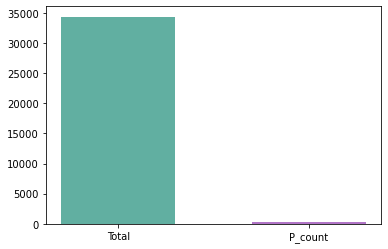

In [45]:
x3 = np.array(["Total","P_count"])
y3 = np.array([non_p_count,p_count])
plt.bar(x3, y3, width= 0.6 , color=["#61afa1", "#b175c7"])
plt.show()

In [46]:
percentage_p  = round((p_count/non_p_count)*100)
percentage_p

print(f"{percentage_p}%")

1%


In [47]:
#new_df['p_count'] = new_df.next_aa.str.count('P')

In [48]:
#pattern = re.compile(".+([RK]P).+")
#pattern = re.compile(".+([RK]P).*\|.*,?")
#for i, line in enumerate(open('result.txt')):
 #   for match in re.finditer(pattern, line):
  #      print  (i+1, match.group())

In [49]:
#protein1= 'EEAEVKPEVKISEKKKIAEKIKEKERQQKKRQEEIKKRLEEPEEPKVLTPEEQLADKLRL'
#peptide1= 'LTPEEQLADKLRL'
#try:
 #   position= protein1.find(peptide1)
  #  next_position= position+len(peptide1)
   # protein1[next_position]
#except:
 #   print('not found')